In [1]:
# Scientific libraries
import numpy as np
import scipy


# Graphic libraries

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("presentation")

# Creating alias for magic commands

# LPPview Classes
from LPPview import *
import pandas as pd

from tqdm import tqdm_notebook as tqdm

In [2]:
from datetime import datetime
import matplotlib.dates as mdates
from  scipy.ndimage import gaussian_filter1d as smooth 

In [3]:
df = pd.read_csv("./2ON01FR-20181105_-_station_sol_X.txt")
df["date"] = pd.to_datetime(df.time.values - datetime.timestamp(pd.to_datetime('2000-01-01 00:00:0'))
                                + datetime.timestamp(pd.to_datetime('2017-05-17 01:45:43')), unit='s') 

df.head()

,time,vGS4,iGS4,tGS4,vGS1,tGS1,iGS1,tBat,vBat,vGS2,...,RSSI,iTX,tPA,i1200,i3v3,v3v3,i5v,v5v,tSU,date
0,946693603,35,0,-22.1,35,-18.9,0,-1.3,8069,35,...,1224,0,14.7,0,0,0,0,0,0.0,2017-05-17 03:12:26
1,946693633,35,0,-22.1,35,-18.9,0,-1.3,8069,35,...,1264,0,13.1,0,0,0,0,0,0.0,2017-05-17 03:12:56
2,946693694,35,0,-23.7,35,-20.5,0,-1.3,8069,35,...,1200,0,13.1,0,0,0,0,0,0.0,2017-05-17 03:13:57
3,946693724,35,0,-23.7,35,-20.5,0,-1.3,8069,35,...,1200,0,13.1,0,0,0,0,0,0.0,2017-05-17 03:14:27
4,946693739,35,0,-23.7,35,-20.5,0,-1.3,8069,35,...,1328,0,13.1,0,0,0,0,0,0.0,2017-05-17 03:14:42


In [4]:
df["hour"] = pd.DatetimeIndex("2019-01-01 "+df.date.dt.hour.astype(str)+':'+
                              df.date.dt.minute.astype(str)+":"+
                              df.date.dt.second.astype(str),)


In [5]:
df.keys()

Index(['time', 'vGS4', 'iGS4', 'tGS4', 'vGS1', 'tGS1', 'iGS1', 'tBat', 'vBat',
       'vGS2', 'tGS2', 'iGS2', 'vGS3', 'tGS3', 'iGS3', 'iADCS', 'tODB', 'iRX',
       'RSSI', 'iTX ', 'tPA', 'i1200', 'i3v3', 'v3v3', 'i5v', 'v5v', 'tSU',
       'date', 'hour'],
      dtype='object')

# Temperature

We had some noise to the data for smoother visualisation

In [6]:
df['mean_tBat'] = smooth(df['tBat'], 50)
df['error_mean_tBat'] = df['tBat'] - df['mean_tBat'] 

df['tBat_noise'] = df['tBat'] + np.random.randn(len(df['tBat']))*1

/home/tavant/these/code/venv/stand/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.2)


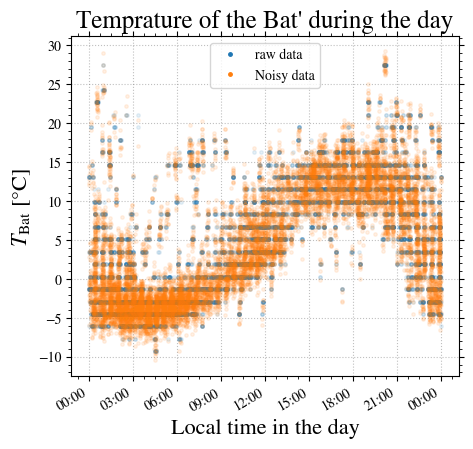

In [7]:
fig, ax = plt.subplots(1)
df.plot(x="hour", y="tBat", style=".", ax=ax, alpha=0.1)
df.plot(x="hour", y="tBat_noise", style=".", ax=ax, alpha=0.1)

#set ticks every week
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

ax.set_xlabel("Local time in the day")
ax.set_ylabel("$T_{\\rm Bat}$ [°C] ")
plt.title("Temprature of the Bat' during the day")



leg = plt.legend([ "raw data", "Noisy data"])
for lh in leg.legendHandles: 
    lh._legmarker.set_alpha(1)

In [14]:
from bokeh.plotting import figure, output_file, show
from bokeh.embed import json_item

In [9]:
# output to static HTML file
output_file("tbat.html")

# create a new plot with a title and axis labels
p = figure(title="Temprature of the Bat' during the day", x_axis_label="Local time in the day", y_axis_label="$T_{\\rm Bat}$ [°C] ")

# add a line renderer with legend and line thickness
p.circle(df.hour, df.tBat, legend_label="Temp.", line_width=2)
# show the results
show(p)

In [10]:
import json

In [19]:
filename = "../../static/plots/tbat.json"
with open(filename, "w") as f:
    json.dump(json_item(p, "myplot"), f)

In [22]:
from bokeh.embed import autoload_static
from bokeh.resources import CDN

In [25]:
js, tag = autoload_static(p, CDN, "path")